                                                    LAB ASSIGNMENTS
                                            Module 2: Machine Learning

K-Nearest Neighbour

Q1. Perform KNN Classification on RidingMovers.csv data set
a. Visualize the data using matplotlib
b. Do train test split keep test_size =0.3
c. Calculate roc_curve and roc_auc curve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset
data = pd.read_csv(r"D:\1_AJINKYA_PAWAR\3_SOFTWARE JOB\1_CDAC\3_AI_Course\Lab_Assignment_Module_2\2_4_2_KNN_1Hr\RidingMowers.csv")

# Displaying the first few rows of the dataset to understand its structure
print(data.head())


   Income  Lot_Size    Response
0      34        26  Not Bought
1      34        40  Not Bought
2      34        46  Not Bought
3      34        48  Not Bought
4      34        53  Not Bought


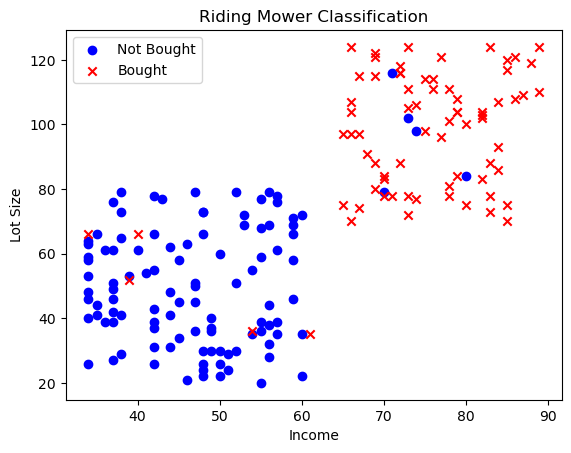

In [7]:
# Modify the target variable
data['Response'] = data['Response'].map({'Bought': 1, 'Not Bought': 0})

# Define the features (X) and the target (y)
X = data[['Income', 'Lot_Size']]
y = data['Response']

# Visualize the data
plt.scatter(X[y == 0]['Income'], X[y == 0]['Lot_Size'], label='Not Bought', marker='o', color='b')
plt.scatter(X[y == 1]['Income'], X[y == 1]['Lot_Size'], label='Bought', marker='x', color='r')
plt.xlabel('Income')
plt.ylabel('Lot Size')
plt.legend(loc='best')
plt.title('Riding Mower Classification')
plt.show()






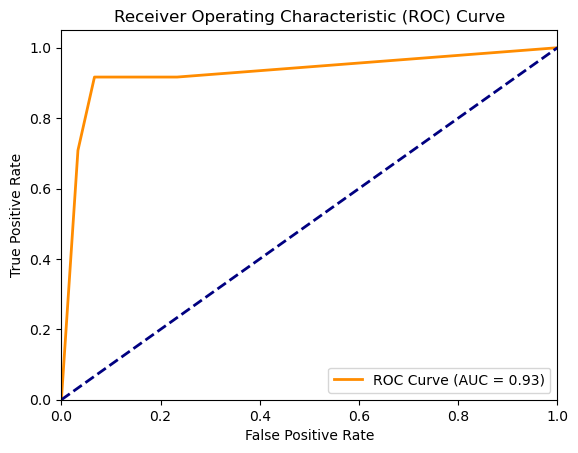

ROC AUC Score: 0.9263888888888887


In [8]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with a chosen number of neighbors (e.g., k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Get the predicted probabilities for the positive class
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Visualize the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display the ROC AUC score
print("ROC AUC Score:", roc_auc)
